# **Multimodal Fusion Networks : A Case Study on Bridging Vision, Language, and Neuro-Signals**

---

<div id="detail-kelompok" align="center">

  **Kelompok 7**

  Dafa Khairu Fadillah Wantasen (220211060069)

  Fritz Elbert Christopel Manambe (220211060130)
  
  Justisya Injilia Tumbel (220211060229)

  <br>

</div>

---

<br>

Metodologi *Data Science* / *Machine Learning* yang digunakan dalam pengembangan *Project* ini didasarkan pada:

<br>
<div align="center">

  KEPMENAKER RI NOMOR 299 TAHUN 2020 <br>

  TENTANG <br>

  PENERAPAN STANDAR KOMPETENSI KERJA NASIONAL INDONESIA (SKKNI) KATEGORI INFORMASI DAN KOMUNIKASI GOLONGAN POKOK AKTIVITAS PEMROGRAMAN, KONSULTASI KOMPUTER, DAN KEGIATAN YANG BERHUBUNGAN DENGAN ITU (YBDI) BIDANG KEAHLIAN *ARTIFICIAL INTELLIGENCE* SUBBIDANG *DATA SCIENCE*

</div>


# I. *Business Understanding*
Di bagian ini bahas kek *reasoning* kenapa kita ambil *case study* ini. Bagaimana relevansi latar belakangnya, etc.

*menurut SKKNI:

Fungsi dasar:
1. Menentukan objektif bisnis
2. Menentukan tujuan teknis *data science*
3. Membuat rencana proyek *data science*

# II. *Data Understanding*
Fungsi dasar meliputi:
1. Mengumpulkan data
2. Menelaah data
3. Memvalidasi data

Bagian ini bisa dibilang sebagai *Exploratory Data Analysis* (EDA)

In [2]:
# @title Data Gathering

import pandas as pd

# Define the raw GitHub URL for the dataset
github_url = 'https://raw.githubusercontent.com/fritzm19/dataset-project-ml-crop/refs/heads/main/Crop_recommendation.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(github_url)

print("DataFrame 'df' loaded successfully.")
print(f"First 5 rows of the DataFrame:\n{df.head()}")

DataFrame 'df' loaded successfully.
First 5 rows of the DataFrame:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
# @title Menelaah Data

print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Descriptive Statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
# @title Memvalidasi Data

print("Missing Values:\n", df.isnull().sum())

Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# III. *Data Preparation*
Fungsi dasar meliputi:
1. Memilah data
2. Membersihkan data
3. Mengkonstruksi data
4. Menentukan Label Data
5. Mengintegrasikan data

Bisa disebut sebagai *Data Preprocessing*

In [5]:
# @title Memilah data

X = df.drop('label', axis=1)
y = df['label']

print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())

Features (X) head:
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Target (y) head:
 0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [6]:
# @title Data Cleaning

print(f"Initial shape of X: {X.shape}")
print(f"Initial shape of y: {y.shape}")

# 1. Check for duplicate rows in X
duplicate_rows = X.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"\nNumber of duplicate rows found in X: {num_duplicates}")

# 2. If duplicates are found, remove them from both X and y
if num_duplicates > 0:
    X = X[~duplicate_rows].reset_index(drop=True)
    y = y[~duplicate_rows].reset_index(drop=True)
    print("Duplicate rows removed from X and y.")
else:
    print("No duplicate rows found in X. No action taken.")

# 3. Verify that duplicates have been successfully removed
num_duplicates_after_removal = X.duplicated().sum()
print(f"\nNumber of duplicate rows in X after removal: {num_duplicates_after_removal}")
print(f"New shape of X: {X.shape}")
print(f"New shape of y: {y.shape}")

Initial shape of X: (2200, 7)
Initial shape of y: (2200,)

Number of duplicate rows found in X: 0
No duplicate rows found in X. No action taken.

Number of duplicate rows in X after removal: 0
New shape of X: (2200, 7)
New shape of y: (2200,)


In [7]:
# @title Mengkonstruksi Data

from sklearn.preprocessing import LabelEncoder

# 1. Instantiate LabelEncoder
le = LabelEncoder()

# 2. Fit and transform the target variable 'y'
y = le.fit_transform(y)

print("First 5 encoded target values (y_encoded):")
print(y[:5])

print("\nUnique classes found by LabelEncoder:")
print(le.classes_)

First 5 encoded target values (y_encoded):
[20 20 20 20 20]

Unique classes found by LabelEncoder:
['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


# IV. *Modelling*
Fungsi dasar:
1. Membangun skenario pengujian (data splitting)
2. Membangun model

In [8]:
# @title Data Splitting

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.20 means 20% of the data will be used for testing, 80% for training
# random_state for reproducibility
# stratify=y ensures that the proportion of target classes is the same in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


In [9]:
# @title Modelling

from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate the model
# Using RandomForestClassifier
# random_state for reproducibility
model = RandomForestClassifier(random_state=42)

# 2. Train the model on the training data
print("Training the Random Forest model...")
model.fit(X_train, y_train)
print("Model training complete.")

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

print("\nFirst 10 predictions on the test set:")
print(y_pred[:10])
print("\nCorresponding actual labels for the first 10 test samples:")
print(y_test[:10])

Training the Random Forest model...
Model training complete.

First 10 predictions on the test set:
[16  1  6 11 16  3 20  2  1 16]

Corresponding actual labels for the first 10 test samples:
[16  1  6 11 16  3 20  2  1 16]


# V. *Model Evaluation*
Fungsi dasar:
1. Mengevaluasi hasil pemodelan
2. Melakukan review proses pemodelan

In [10]:
# @title Classification Report
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 2. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
    

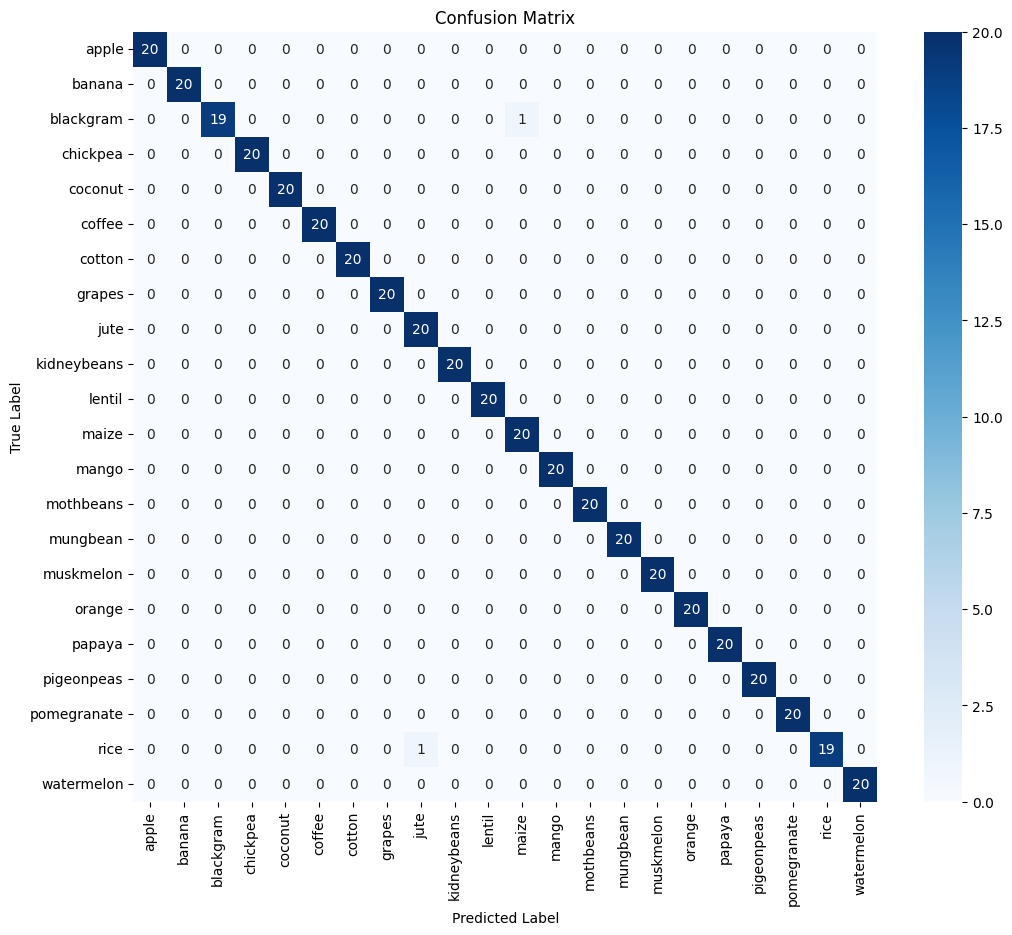

In [11]:
# @title Confusion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

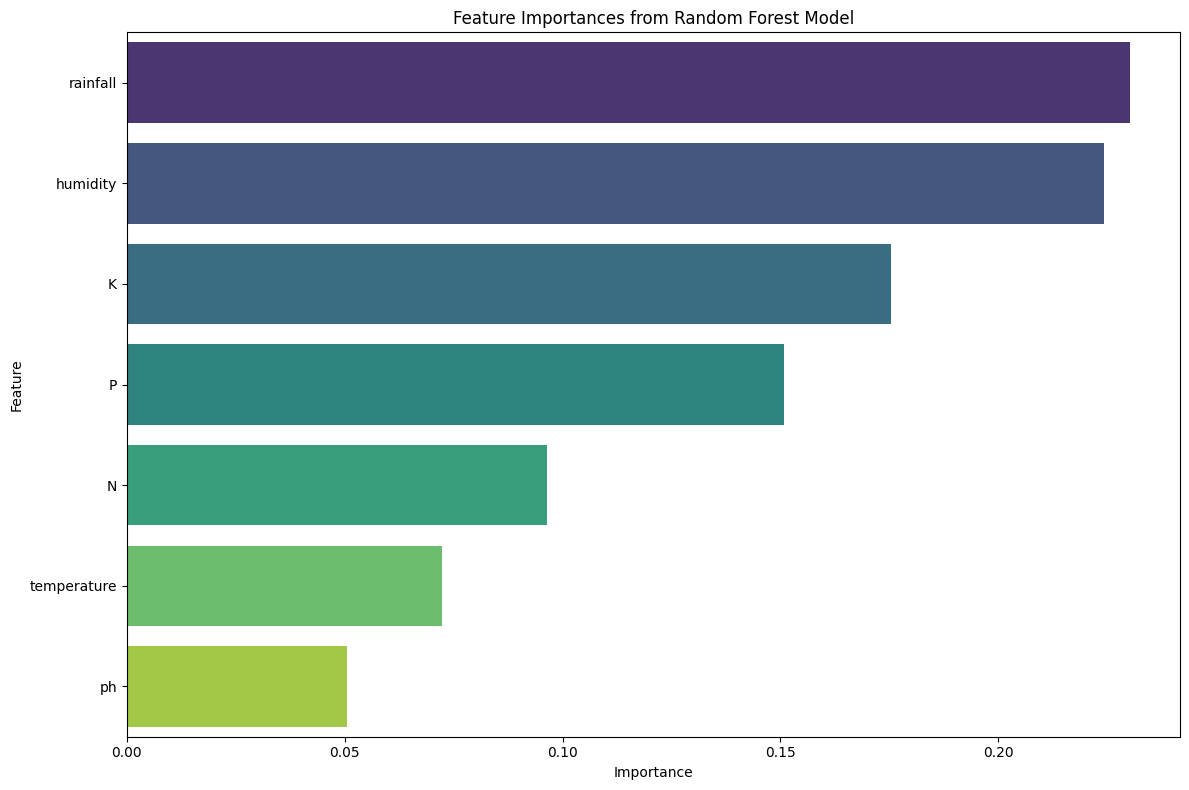

In [12]:
# @title Visualizing Feature Importance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Get feature names from the original DataFrame X
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# VI. *Deployment*

Fungsi dasar:
1. Membuat rencana *deployment* model
2. Melakukan *deployment* model
3. Membuat rencana pemeliharaan
4. Melakukan pemeliharaan model

In [16]:
import joblib
import os

# 1. Define the correct relative path
# ".." means go up one level from 'notebooks' folder
# "model" is the folder name shown in your tree
save_dir = os.path.join('..', 'model') 
model_filename = 'random_forest_model.joblib'
model_filepath = os.path.join(save_dir, model_filename)

# 2. Create the directory if it doesn't exist (Safety check)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Created directory: {save_dir}")

# 3. Save the model
joblib.dump(model, model_filepath)

print(f"✅ Model successfully saved to: {os.path.abspath(model_filepath)}")

✅ Model successfully saved to: c:\Users\user\agri-tech\model\random_forest_model.joblib


## Deployment (streamlit)

Model yang telah di latih kemudian di simpan ke dalam format joblib dan digunakan untuk melakukan inference (model menerima inputan baru/data yang belum pernah dilihat sebelumnya)

Link deployment:

# Link Video Presentasi Kelompok
[link-video-presentasi-kelomopk-7](https://www.google.com)